## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

# Chapter 004 Example 006C

## Part A - Load libraries

In [1]:
from sklearn import linear_model
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Part B - Load Data

In [2]:
fileName = '../../Data/Roses01.csv'
fileFullName = os.path.abspath(fileName)
print(fileFullName)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Data\Roses01.csv


In [3]:
rosesdf= pd.read_csv(fileFullName,header=0)
print(rosesdf.shape)
print(rosesdf.columns)

(150, 5)
Index(['F01', 'F02', 'F03', 'F04', 'T'], dtype='object')


## Part C - select first two features.

In [4]:
X = np.array(rosesdf[['F01', 'F03']]) 
Y = np.array(rosesdf['T'])

## Part D - Create Logistic Regression Model

In [5]:
logreg = linear_model.LogisticRegression(C=1e6, solver='lbfgs', multi_class='ovr', n_jobs=8,verbose=True, max_iter=1968, dual=False, class_weight='balanced', warm_start=False)

## Part E - Activate the Neighbours Classifier Model and fit the data.

In [6]:
logreg.fit(X, Y)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:   16.5s finished


LogisticRegression(C=1000000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1968,
          multi_class='ovr', n_jobs=8, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=True, warm_start=False)

## Part F - Plot the decision boundary. 
You will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].

In [7]:
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

## Part G - Put the result into a color plot with the the training points

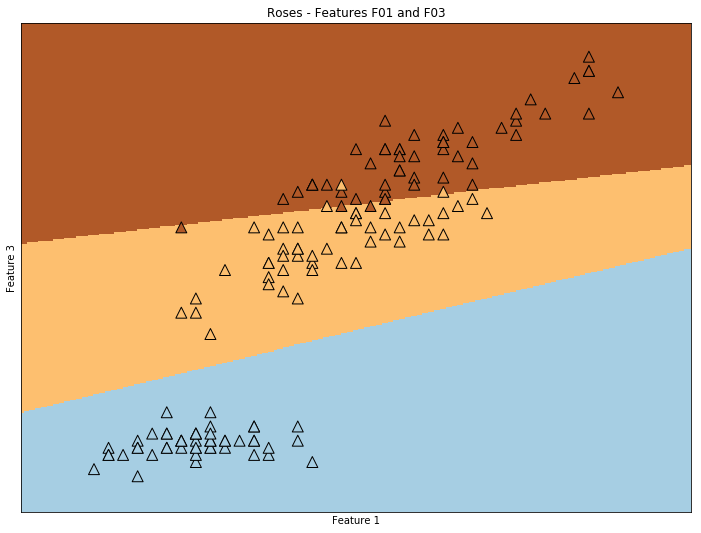

In [8]:
Z = Z.reshape(xx.shape)
fig = plt.figure(1, figsize=(12, 9))
plt.title('Roses - Features F01 and F03')
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired, marker='^', s=120)
plt.xlabel('Feature 1')
plt.ylabel('Feature 3')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [9]:
imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 04'])
print(imagepath)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 04


In [10]:
if not os.path.exists(imagepath):
    os.makedirs(imagepath)

In [11]:
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 04','Chapter-004-Example-006C-01.jpg'])
fig.savefig(imagename, bbox_inches='tight')

In [12]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-04-06 14:18:12.988918
